In [90]:
import pandas as pd
import numpy as np
import pickle
import xgboost as xgb
import datetime
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
pd.set_option('display.max_columns', None)

In [141]:
df=pd.read_excel('◎位置情報と対応(水道水) 基準満たしているか否か.xlsx')
df=df.dropna(axis=0)

In [142]:
df

,NAME,Rowid,XY水道水位置情報,X,Y,up_down,curvature,inclination,tilt_direction,altitude,disto_river,disto_stations,disto_mainroad,disto_syorizyo,supply_hours,no_water_days,total_population,population_served,popu-served,number_taps,pipelength,pipelength_per_pipe,served/pipes,(popu-served)/pipes,oldest_pipe_age,ST,RSF,FL,PF,RF,EColi.
0,Mahendranagar,4,192,80.1732,28.967150,61,864000000,89.976921,244.983109,221,0.008422,0.118698,0.002436,704.208459,9.0,56.78,48936,11298,37638,2002,30.957,0.015463,364.957845,1215.815486,40,0,1,0,0,0,0
1,Mahendranagar,2,191,ｓ,28.974328,25,432000000,89.980904,36.869896,223,0.000505,0.114137,0.000863,841.848117,9.0,56.78,48936,11298,37638,2002,30.957,0.015463,364.957845,1215.815486,40,0,1,0,0,0,1
2,Mahendranagar,3,188,ｓｓ,28.958797,0,-288000000,89.947029,123.690071,214,0.002185,0.129072,0.006192,1017.720385,9.0,56.78,48936,11298,37638,2002,30.957,0.015463,364.957845,1215.815486,40,0,1,0,0,0,0
3,Mahendranagar,1,190,80.1867,28.971595,0,-432000000,89.945984,135.000000,217,0.002295,0.122961,0.001804,737.567540,9.0,56.78,48936,11298,37638,2002,30.957,0.015463,364.957845,1215.815486,40,0,1,0,0,0,0
4,Dhangadhi,7,197,80.5655,28.705933,177,-432000000,89.955597,305.537689,181,0.003237,0.027089,0.004993,1300.239907,12.0,1.06,36000,26220,9780,4469,50.000,0.011188,524.400000,195.600000,40,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,Bhadrapur,213,148,88.0746,26.545469,0,864000000,89.962547,168.690063,92,0.004671,0.042181,0.017736,4431.704313,9.0,0.66,22000,12062,9938,1822,48.700,0.026729,247.679671,204.065708,46,1,1,0,0,0,1
216,Bhadrapur,208,152,88.0793,26.561851,171,-720000000,89.914589,296.565063,94,0.003045,0.048199,0.001982,4599.404390,9.0,0.66,22000,12062,9938,1822,48.700,0.026729,247.679671,204.065708,46,1,1,0,0,0,1
217,Bhadrapur,207,151,88.08,26.558706,35,576000000,89.947029,236.309937,93,0.000700,0.045488,0.004072,4664.033414,9.0,0.66,22000,12062,9938,1822,48.700,0.026729,247.679671,204.065708,46,1,1,0,0,0,1
218,Bhadrapur,215,149,88.0878,26.539138,0,-144000000,89.729904,135.000000,87,0.003060,0.027479,0.004462,5921.463636,9.0,0.66,22000,12062,9938,1822,48.700,0.026729,247.679671,204.065708,46,1,1,0,0,0,1


In [143]:
y=df['EColi.']
X=df.loc[:, ['up_down', 'curvature', 'inclination', 'tilt_direction', 'altitude', 'disto_river', 'disto_stations', 
             'disto_mainroad', 'disto_syorizyo', 'supply_hours', 'no_water_days', 'total_population ', 'population_served',
             'popu-served', 'number_taps', 'pipelength', 'pipelength_per_pipe', 'served/pipes', '(popu-served)/pipes', 
             'oldest_pipe_age', 'ST', 'RSF', 'FL', 'PF', 'RF']]

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3,
                                                  random_state=1, stratify=y)
print('Labels counts in y:', np.bincount(y))
print('Lables counts in y_train:', np.bincount(y_train))
print('Lables counts in y_test:', np.bincount(y_test))

Labels counts in y: [ 98 120]
Lables counts in y_train: [68 84]
Lables counts in y_test: [30 36]


In [145]:
X_train_std=(X_train-X_train.mean(axis=0))/X_train.std(axis=0)
X_test_std=(X_test-X_train.mean(axis=0))/X_train.std(axis=0)

In [146]:
def threshold(fare):
    if fare<=0:
        return 0
    else:
        return 1

In [147]:
X_train_std['ST']=X_train_std['ST'].apply(threshold)
X_train_std['RSF']=X_train_std['RSF'].apply(threshold)
X_train_std['FL']=X_train_std['FL'].apply(threshold)
X_train_std['PF']=X_train_std['PF'].apply(threshold)
X_train_std['RF']=X_train_std['RF'].apply(threshold)
X_test_std['ST']=X_test_std['ST'].apply(threshold)
X_test_std['RSF']=X_test_std['RSF'].apply(threshold)
X_test_std['FL']=X_test_std['FL'].apply(threshold)
X_test_std['PF']=X_test_std['PF'].apply(threshold)
X_test_std['RF']=X_test_std['RF'].apply(threshold)

# SVC

In [148]:
from sklearn.svm import SVC
svm=SVC(kernel='linear', C=100, random_state=1, probability=True)
svm.fit(X_train_std, y_train)
print(svm.score(X_train_std, y_train))
print(svm.score(X_test_std, y_test))

In [152]:
from sklearn.metrics import confusion_matrix
y_pred=svm.predict(X_test_std)
confmat=confusion_matrix(y_true=y_test, y_pred=y_pred)

Text(0, 0.5, 'true label')

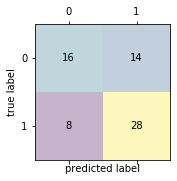

In [153]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
        
plt.xlabel('predicted label')
plt.ylabel('true label')


# ロジスティック回帰

In [154]:
lr=LogisticRegression(C=10, random_state=1)

In [155]:
lr.fit(X_train_std, y_train)

C:\Users\kurokiso\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10, random_state=1)

In [156]:
lr.score(X_train_std, y_train)

0.7171052631578947

In [157]:
lr.score(X_test_std, y_test)

0.6515151515151515

In [158]:
from sklearn.metrics import confusion_matrix
y_pred=lr.predict(X_test_std)
confmat=confusion_matrix(y_true=y_test, y_pred=y_pred)

Text(0, 0.5, 'true label')

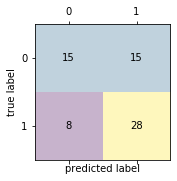

In [159]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
        
plt.xlabel('predicted label')
plt.ylabel('true label')


# random forest

In [160]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
forest=RandomForestClassifier(max_depth=20, criterion='entropy', n_estimators=40, random_state=1)

In [162]:
forest.fit(X_train_std, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=40,
                       random_state=1)

In [163]:
forest.score(X_train_std, y_train)

1.0

In [164]:
forest.score(X_test_std, y_test)

0.7727272727272727

In [165]:
from sklearn.metrics import confusion_matrix
y_pred=forest.predict(X_test_std)
confmat=confusion_matrix(y_true=y_test, y_pred=y_pred)

Text(0, 0.5, 'true label')

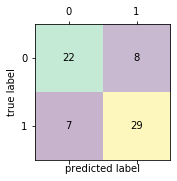

In [166]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
        
plt.xlabel('predicted label')
plt.ylabel('true label')


# Boosted forest

In [167]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [168]:
tree=DecisionTreeClassifier(max_depth=8, random_state=1)
ada=AdaBoostClassifier(base_estimator=tree, n_estimators=5, learning_rate=0.5, random_state=1)

In [169]:
ada.fit(X_train_std, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=8,
                                                         random_state=1),
                   learning_rate=0.5, n_estimators=5, random_state=1)

In [170]:
ada.score(X_train_std, y_train)

1.0

In [171]:
ada.score(X_test_std, y_test)

0.7272727272727273

In [172]:
from sklearn.metrics import confusion_matrix
y_pred=ada.predict(X_test_std)
confmat=confusion_matrix(y_true=y_test, y_pred=y_pred)

Text(0, 0.5, 'true label')

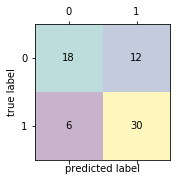

In [173]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
        
plt.xlabel('predicted label')
plt.ylabel('true label')


# ROC AUC

In [83]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
import matplotlib.pyplot as plt
mean_fpr=np.linspace(0, 1, 1000)
svm_mean_tpr=0.0
lr_mean_tpr=0.0
forest_mean_tpr=0.0
ada_mean_tpr=0.0

In [84]:
svm_probas=svm.predict_proba(X_test_std)
lr_probas=lr.predict_proba(X_test_std)
forest_probas=forest.predict_proba(X_test_std)
ada_probas=ada.predict_proba(X_test_std)

In [85]:
svm_fpr, svm_tpr, svm_thresholds=roc_curve(y_test, svm_probas[:, 1], pos_label=1)
lr_fpr, lr_tpr, lr_thresholds=roc_curve(y_test, lr_probas[:, 1], pos_label=1)
forest_fpr, forest_tpr, forest_thresholds=roc_curve(y_test, forest_probas[:, 1], pos_label=1)
ada_fpr, ada_tpr, ada_thresholds=roc_curve(y_test, ada_probas[:, 1], pos_label=1)

In [86]:
svm_mean_tpr+=interp(mean_fpr, svm_fpr, svm_tpr)
lr_mean_tpr+=interp(mean_fpr, lr_fpr, lr_tpr)
forest_mean_tpr+=interp(mean_fpr, forest_fpr, forest_tpr)
ada_mean_tpr+=interp(mean_fpr, ada_fpr, ada_tpr)

C:\Users\kurokiso\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  """Entry point for launching an IPython kernel.
C:\Users\kurokiso\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  
C:\Users\kurokiso\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kurokiso\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  after removing the cwd from sys.path.


In [87]:
svm_mean_tpr[0]=0.0
lr_mean_tpr[0]=0.0
forest_mean_tpr[0]=0.0
ada_mean_tpr[0]=0.0

In [88]:
svm_roc_auc=auc(svm_fpr, svm_tpr)
lr_roc_auc=auc(lr_fpr, lr_tpr)
forest_roc_auc=auc(forest_fpr, forest_tpr)
ada_roc_auc=auc(ada_fpr, ada_tpr)

In [89]:
print(svm_roc_auc)
print(lr_roc_auc)
print(forest_roc_auc)
print(ada_roc_auc)

0.31851851851851853
0.6296296296296298
0.775462962962963
0.6476851851851851


In [90]:
fig=plt.figure(figsize=(7, 5))

<Figure size 504x360 with 0 Axes>

Text(0, 0.5, 'True Positive Rate')

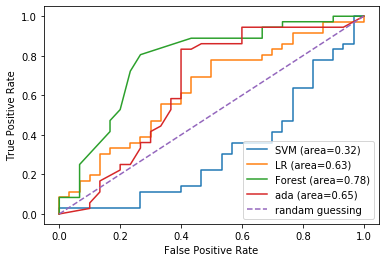

In [91]:
plt.plot(svm_fpr, svm_tpr, label='SVM (area=%0.2f)' %(svm_roc_auc))
plt.plot(lr_fpr, lr_tpr, label='LR (area=%0.2f)' %(lr_roc_auc))
plt.plot(forest_fpr, forest_tpr, label='Forest (area=%0.2f)' %(forest_roc_auc))
plt.plot(ada_fpr, ada_tpr, label='ada (area=%0.2f)' %(ada_roc_auc))
plt.plot([0, 1], linestyle='--', label='randam guessing')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Text(0, 0.5, 'True Positive Rate')

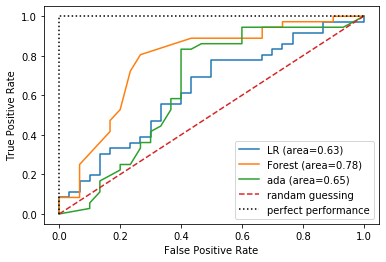

In [92]:
plt.plot(lr_fpr, lr_tpr, label='LR (area=%0.2f)' %(lr_roc_auc))
plt.plot(forest_fpr, forest_tpr, label='Forest (area=%0.2f)' %(forest_roc_auc))
plt.plot(ada_fpr, ada_tpr, label='ada (area=%0.2f)' %(ada_roc_auc))
plt.plot([0, 1], linestyle='--', label='randam guessing')
plt.plot([0, 0, 1], [0, 1, 1], color='black', linestyle=':', label='perfect performance')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')